# Exercise on address mapping

In [13]:
%matplotlib inline
from optparse import OptionParser
import matplotlib.pyplot as plt
import pylab
import random
import math

## Plot description

What follows is a series of plots that show **what fraction of randomly generated virtual addresses are valid, as a function of the value of the bounds register**. In each case 8 random addresses are being mapped. 


 ### Setup code

In [15]:

# to make Python2 and Python3 act the same -- how dumb
def random_seed(seed):
    try:
        random.seed(seed, version=1)
    except:
        random.seed(seed)
    return


def convert(size):
    length = len(size)
    lastchar = size[length - 1]
    if (lastchar == "k") or (lastchar == "K"):
        m = 1024
        nsize = int(size[0 : length - 1]) * m
    elif (lastchar == "m") or (lastchar == "M"):
        m = 1024 * 1024
        nsize = int(size[0 : length - 1]) * m
    elif (lastchar == "g") or (lastchar == "G"):
        m = 1024 * 1024 * 1024
        nsize = int(size[0 : length - 1]) * m
    else:
        nsize = int(size)
    return nsize




### Plot 1

Seed: 1
address space size 1k
phys mem size 16k

Base-and-bounds register information:

  Base: 0x0000363c (decimal 13884)
  Limit: 290


In [50]:


# values from above
random_seed(1)
asize = convert("1k")
psize = convert("16k")


limits = ["0", "50", "100", "150", "200", "250", "300", "350", "400", "450", "500", "550", "600", "650", "700", "750","800", "850", "900", "950", "999"]

base = convert("13884")

validmem = []

#
# now, need to generate virtual address trace
# 
for l in limits:
    limit = convert(l)
    count = 0
    for i in range(0, 100):
        vaddr = int(asize * random.random())
        paddr = 0
        if vaddr >= limit:
            print(
                "  VA %2d: 0x%08x (decimal: %4d) --> SEGMENTATION VIOLATION"
                % (i, vaddr, vaddr)
            )
        else:
            paddr = vaddr + base
            print(
                "  VA %2d: 0x%08x (decimal: %4d) --> VALID: 0x%08x (decimal: %4d)"
                % (i, vaddr, vaddr, paddr, paddr)
            )
            count += 1
    validmem.append(count)
    print("")

print(f"valid mem translations {validmem}")



  VA  0: 0x00000089 (decimal:  137) --> SEGMENTATION VIOLATION
  VA  1: 0x00000363 (decimal:  867) --> SEGMENTATION VIOLATION
  VA  2: 0x0000030e (decimal:  782) --> SEGMENTATION VIOLATION
  VA  3: 0x00000105 (decimal:  261) --> SEGMENTATION VIOLATION
  VA  4: 0x000001fb (decimal:  507) --> SEGMENTATION VIOLATION
  VA  5: 0x000001cc (decimal:  460) --> SEGMENTATION VIOLATION
  VA  6: 0x0000029b (decimal:  667) --> SEGMENTATION VIOLATION
  VA  7: 0x00000327 (decimal:  807) --> SEGMENTATION VIOLATION
  VA  8: 0x00000060 (decimal:   96) --> SEGMENTATION VIOLATION
  VA  9: 0x0000001d (decimal:   29) --> SEGMENTATION VIOLATION
  VA 10: 0x00000357 (decimal:  855) --> SEGMENTATION VIOLATION
  VA 11: 0x000001bb (decimal:  443) --> SEGMENTATION VIOLATION
  VA 12: 0x0000030c (decimal:  780) --> SEGMENTATION VIOLATION
  VA 13: 0x00000002 (decimal:    2) --> SEGMENTATION VIOLATION
  VA 14: 0x000001c8 (decimal:  456) --> SEGMENTATION VIOLATION
  VA 15: 0x000002e2 (decimal:  738) --> SEGMENTATION VI

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.999]


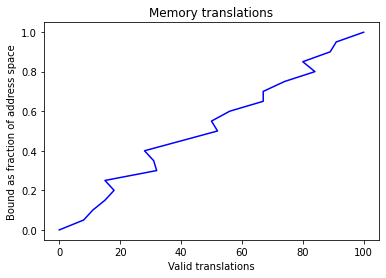

In [51]:
# plot valid mem allocs against the ratio of bound to address size
bofa = [] # bound as fraction of address space
for l in limits: 
    bofa.append(int(l) / 1000)
    
print(bofa)
    
xVals = validmem
yVals = bofa

pylab.figure(1)
pylab.title('Memory translations')
pylab.ylabel('Bound as fraction of address space')
pylab.xlabel('Valid translations')
pylab.plot(xVals, yVals, 'b-')


